In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<ipython-input-2-aa7288b5dbc0>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. Dataset 확인

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check

In [7]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


* Train, Test set에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있음.

<Axes: >

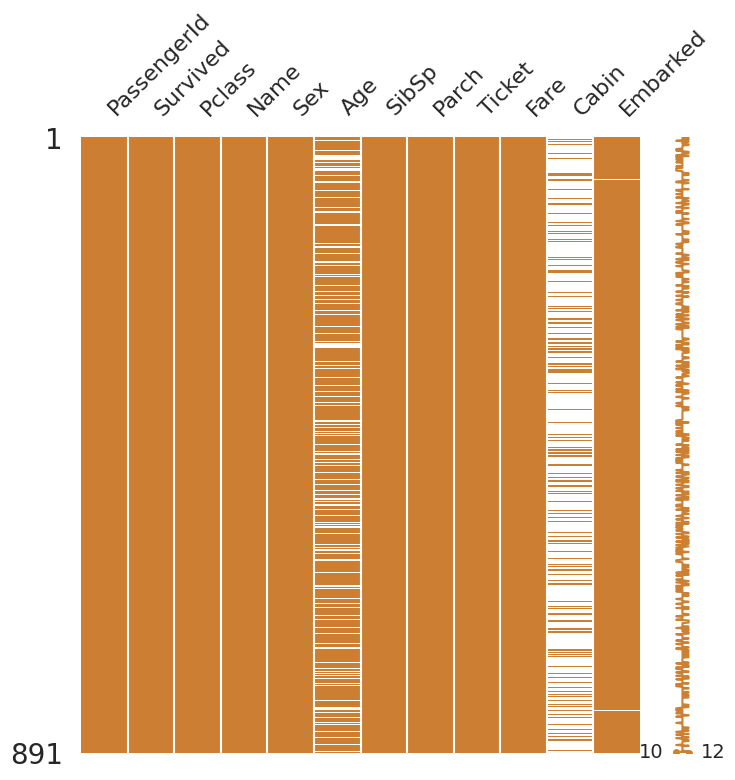

In [9]:
msno.matrix(df=df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

<Axes: >

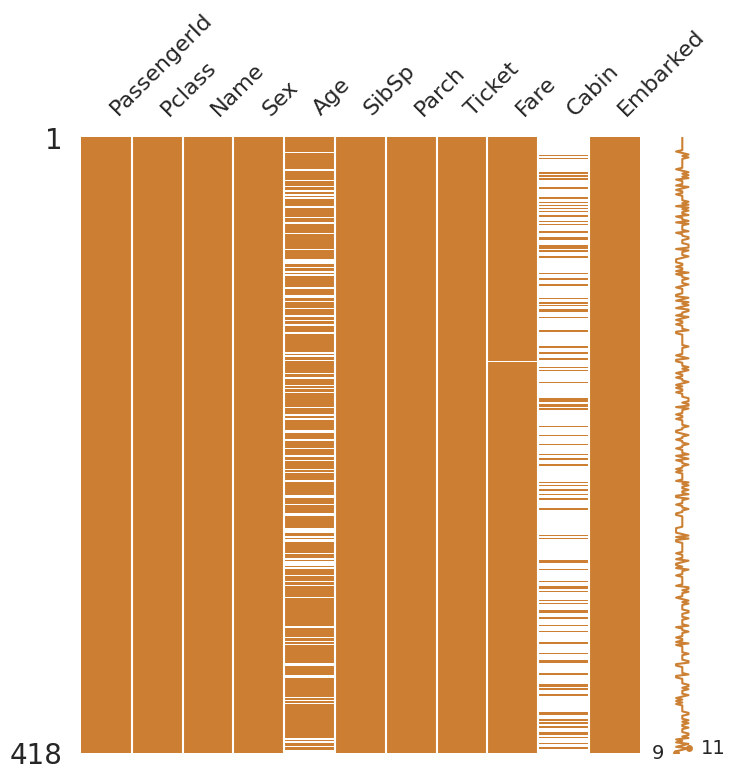

In [10]:
msno.matrix(df=df_test.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

<Axes: >

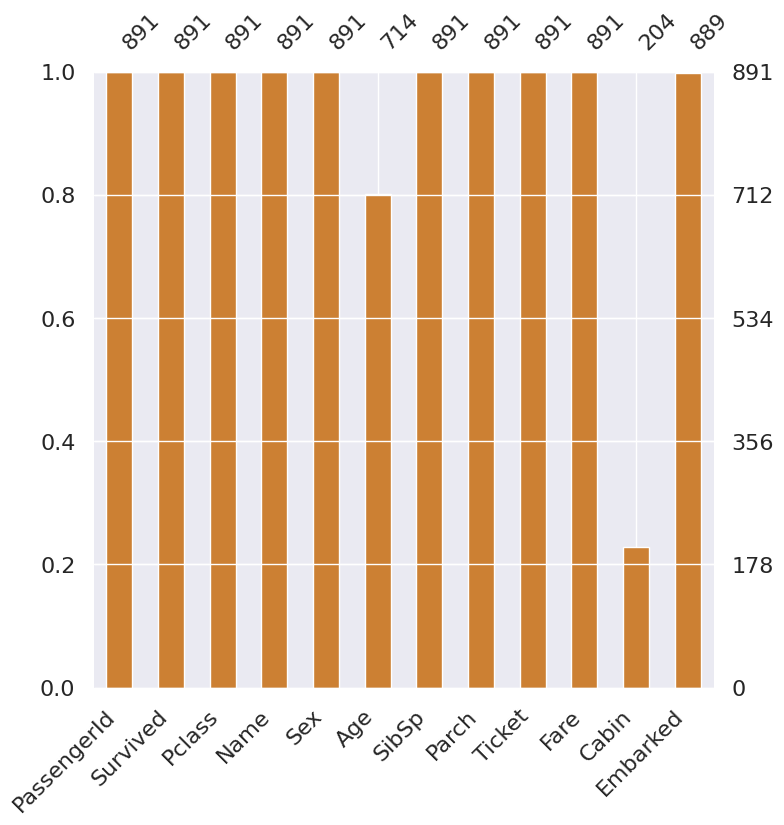

In [11]:
msno.bar(df=df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

<Axes: >

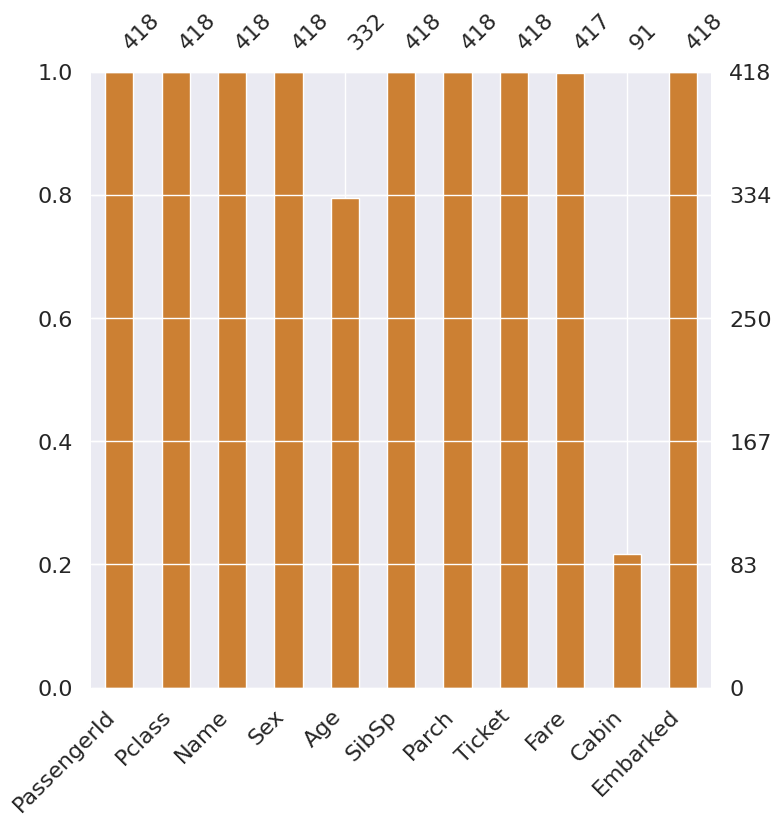

In [12]:
msno.bar(df=df_test.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

### 1.2 Target Label 확인

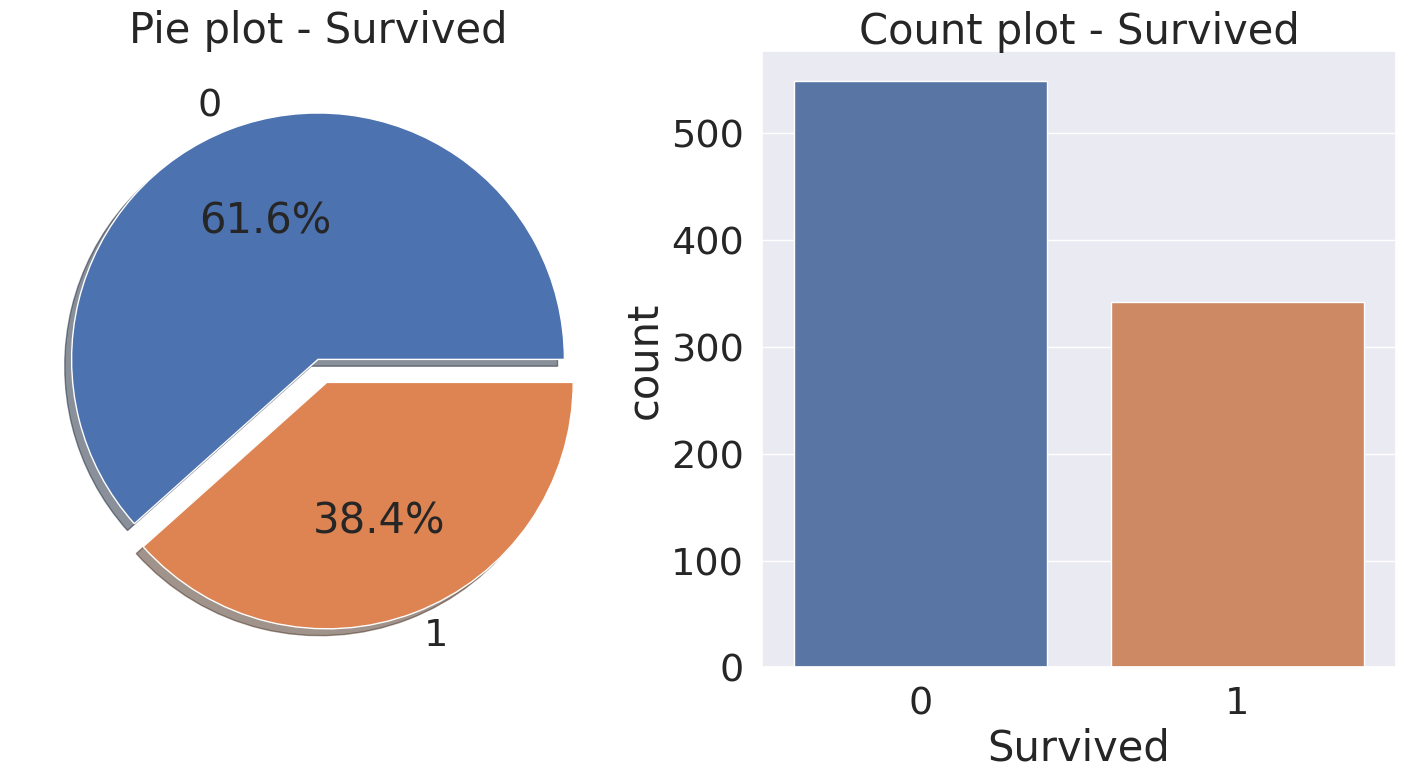

In [13]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 탑승객 중 38.4%만이 생존하였음.
* 생존한 탑승객과 사망한 탑승객의 분포가 균일한 것으로 보임.

## 2. Explorary Data Analysis (EDA)

### 2.1 Pclass

In [14]:
# 각 클래스별 승객수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
# 각 클래스별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

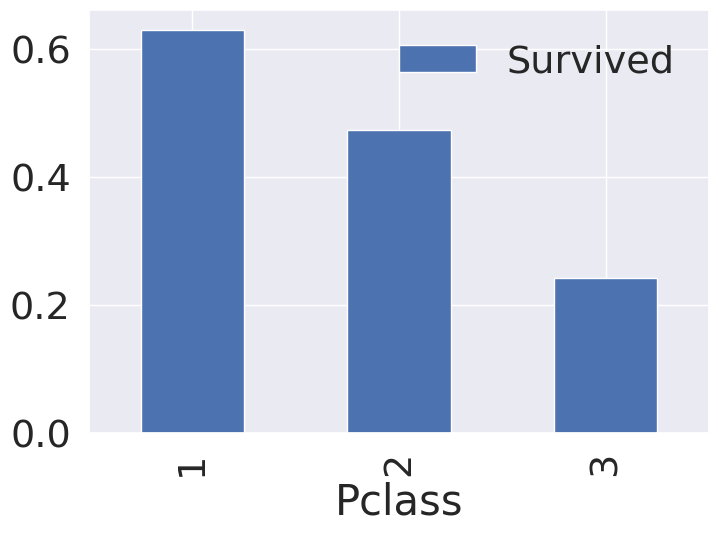

In [17]:
# 각 그룹의 mean값을 구함으로써 생존률을 계산
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

* Class가 높을수록 생존률이 높음을 확인.

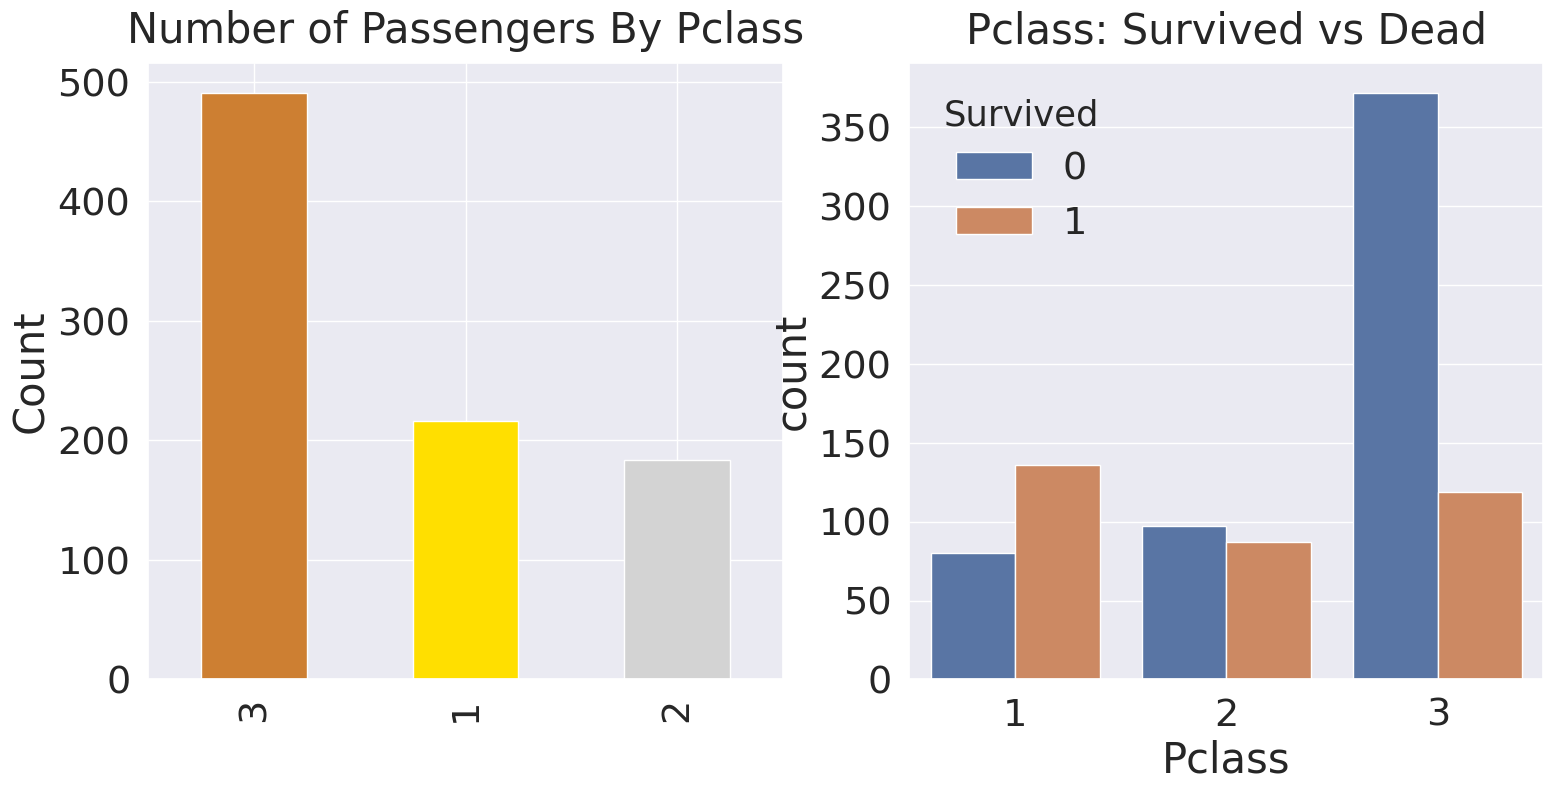

In [18]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

* Class가 높을수록 생존 확률이 높음을 확인할 수 있음.
* Class가 생존 확률에 큰 영향을 준다고 할 수 있음 -> feature로 사용

### 2.2 Sex

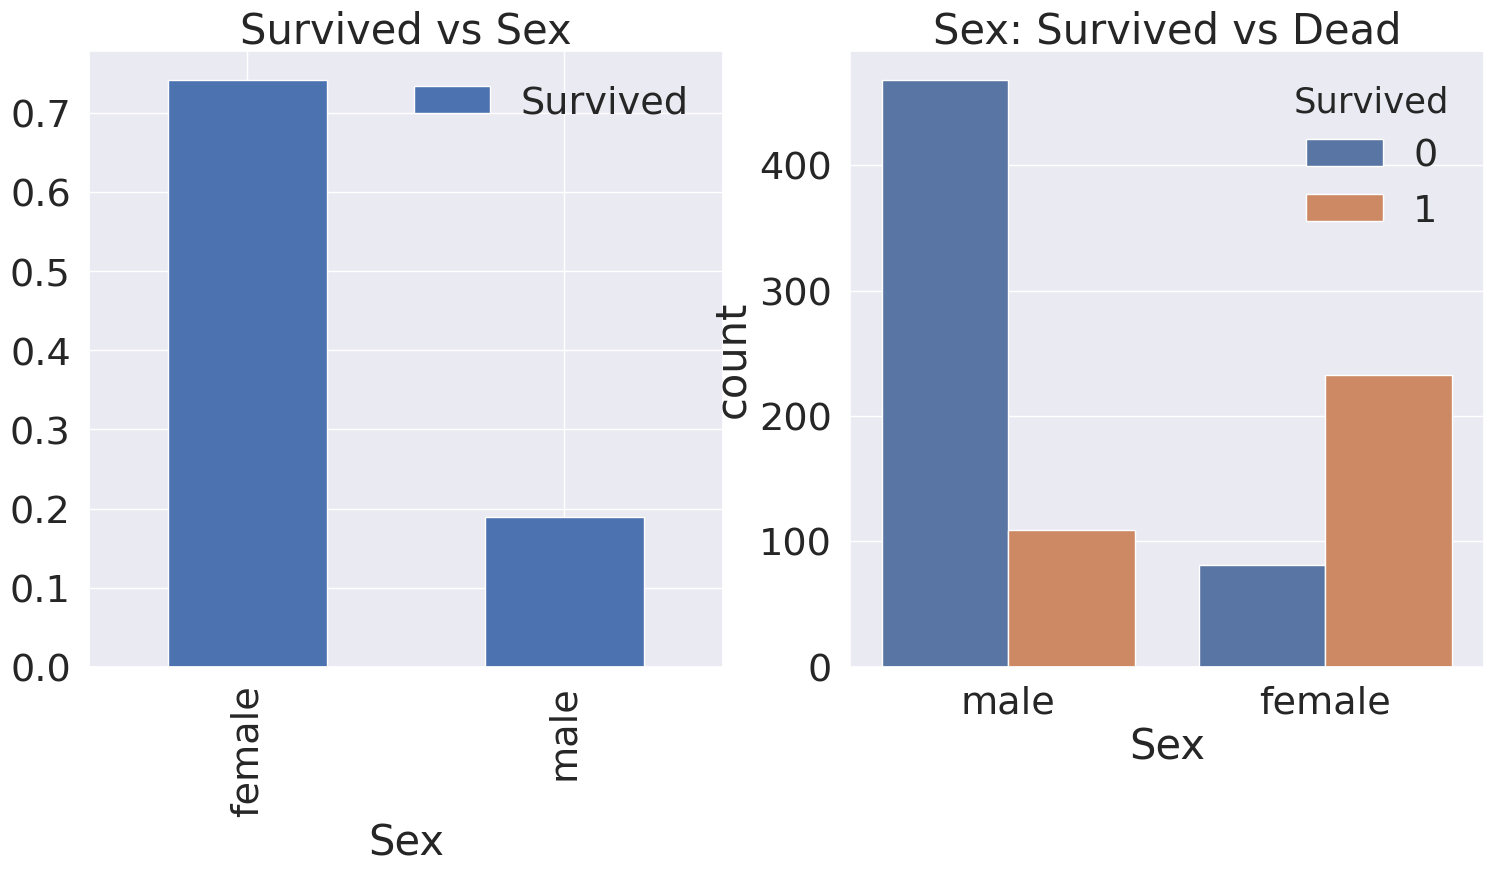

In [19]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

* Female의 생존률이 male 대비 높음.

In [20]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().sort_values(by='Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* 성별도 Pclass와 마찬가지로 생존 확률에 연관이 있음. -> feature로 사용

### 2.3 Both Sex and Pclass

In [22]:
# pip install seaborn==0.9.0

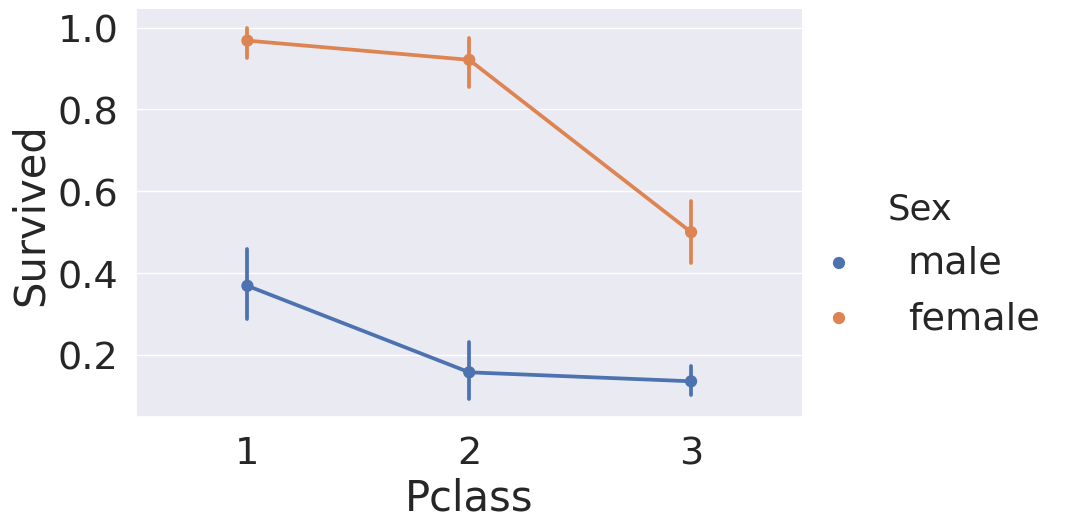

In [23]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)

* 모든 클래스에서 female의 생존률이 높은 것을 확인할 수 있음.
* 성별과 상관없이 클래스가 높을수록 생존률이 올라가는 것을 확인할 수 있음.

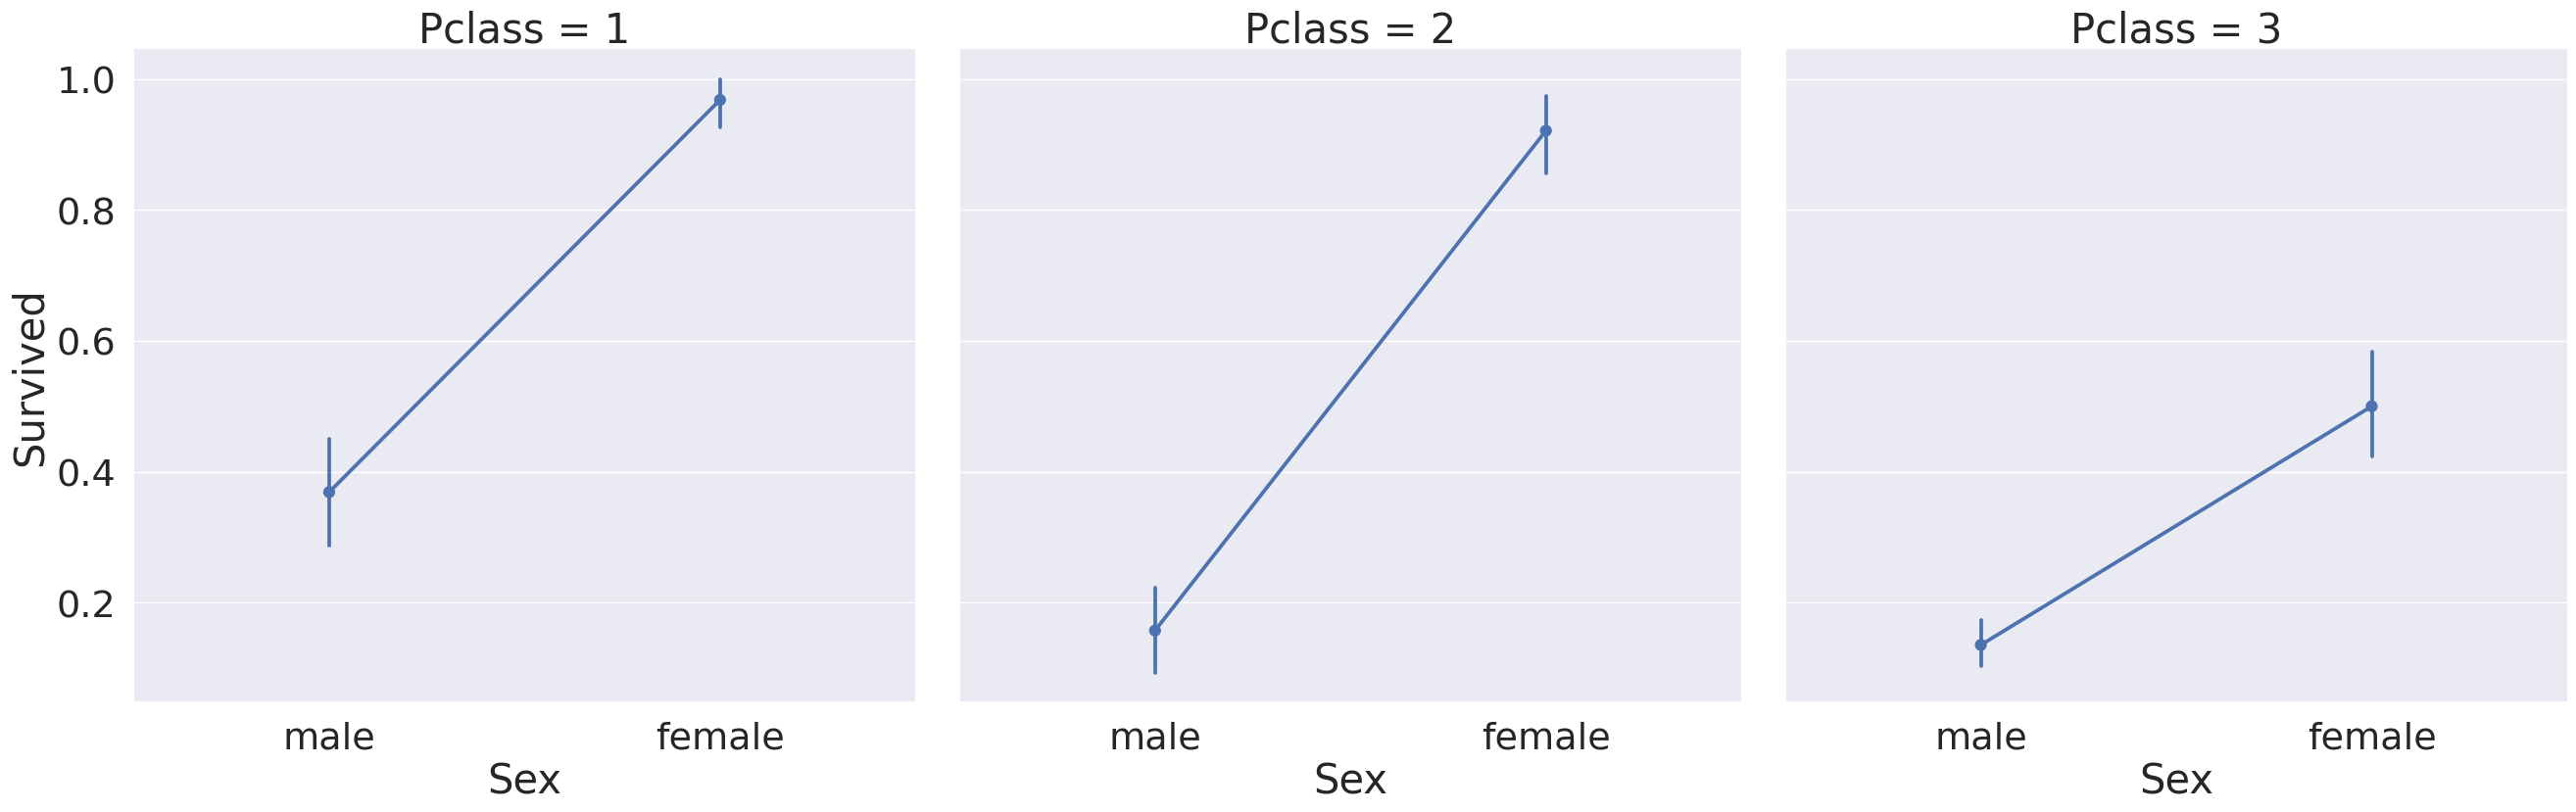

In [24]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data = df_train, satureation = 0.5, size = 9, aspect =1)

### 2.4 Age

In [25]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


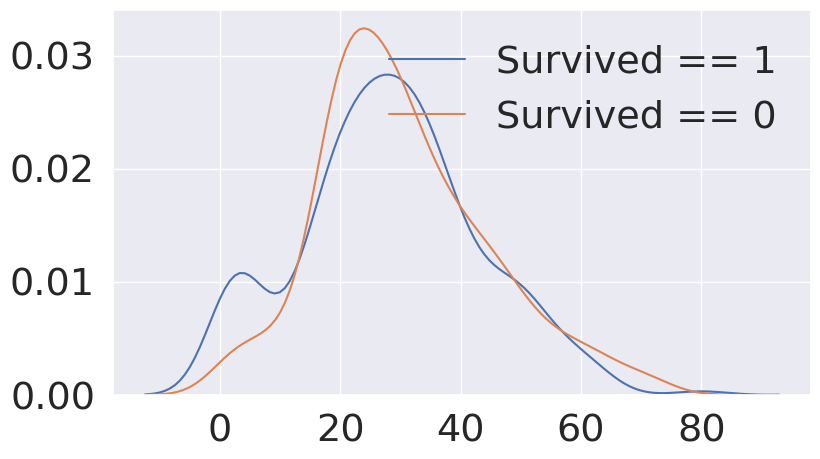

In [26]:
fig, ax = plt.subplots(1,1, figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

* 생존자 중 나이가 어린 경우가 많은 것을 확인할 수 있음.

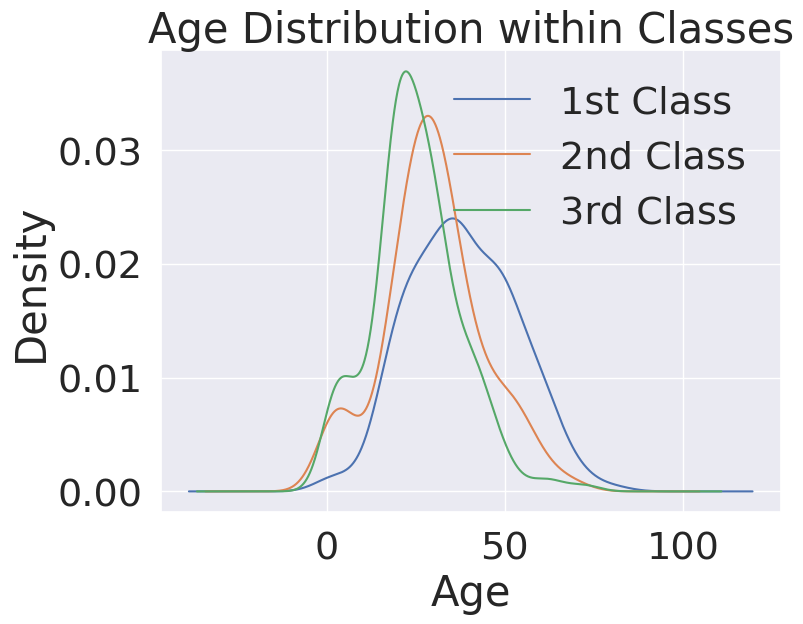

In [27]:
# Age distribution within class
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']==2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']==3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

* Class가 높을수록 나이 많은 사람의 비중이 증가함.

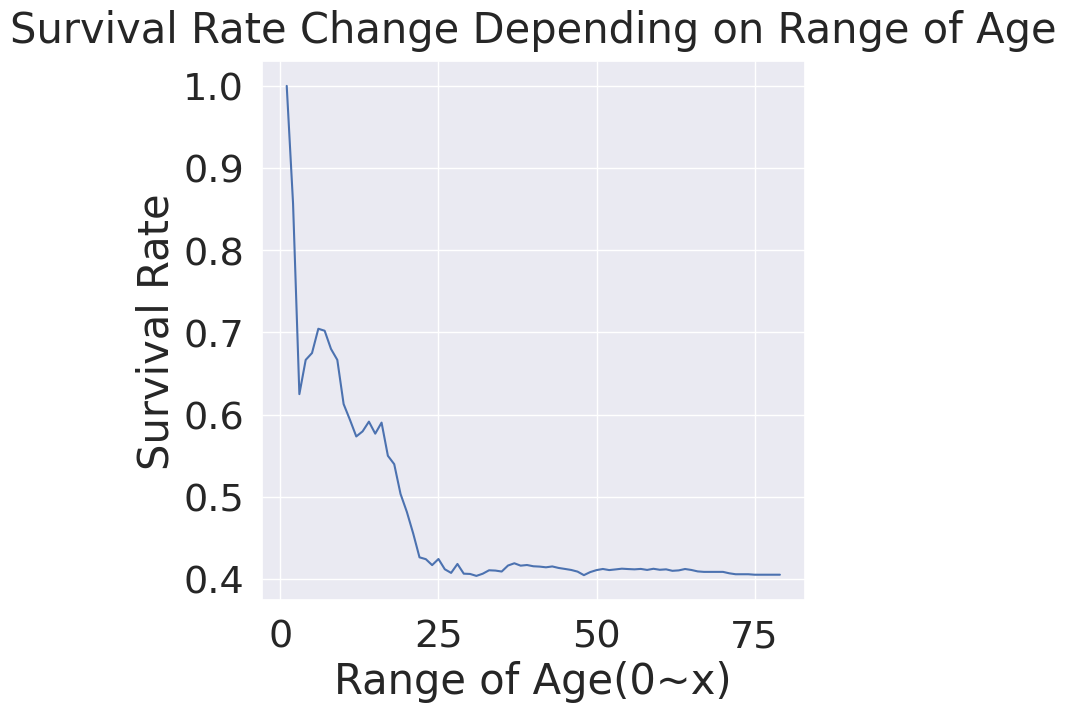

In [30]:
cummulate_survived_ratio = []
for i in range(0,80):
    cummulate_survived_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize = (7,7))
plt.plot(cummulate_survived_ratio)
plt.title('Survival Rate Change Depending on Range of Age', y = 1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이가 어릴수록 생존 확률이 크게 높은 것을 확인할 수 있음. -> feature로 사용

### 2.5 Pclass, Sex, Age

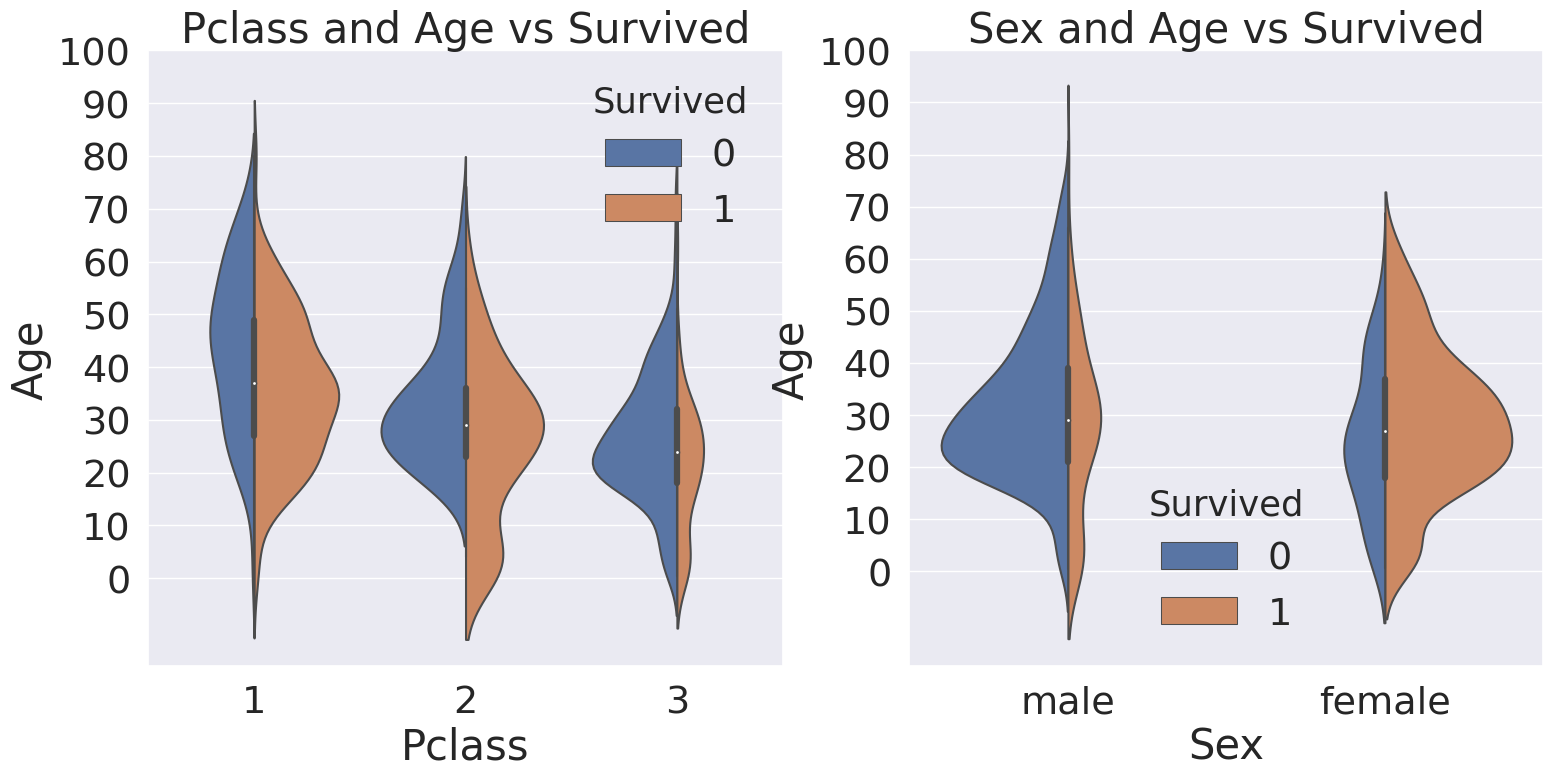

In [32]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot(x='Pclass', y = 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y = 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 생존만 봤을 때, 모든 클래스에서 나이가 어릴수록 생존을 많이함.
* 성별로 봤을 때, 여자가 남자보다 생존을 많이함.
* 이 결과로 보았을 때, 여성과 아이를 먼저 챙긴 것으로 볼 수 있음.

### 2.6 Embarked

<Axes: xlabel='Embarked'>

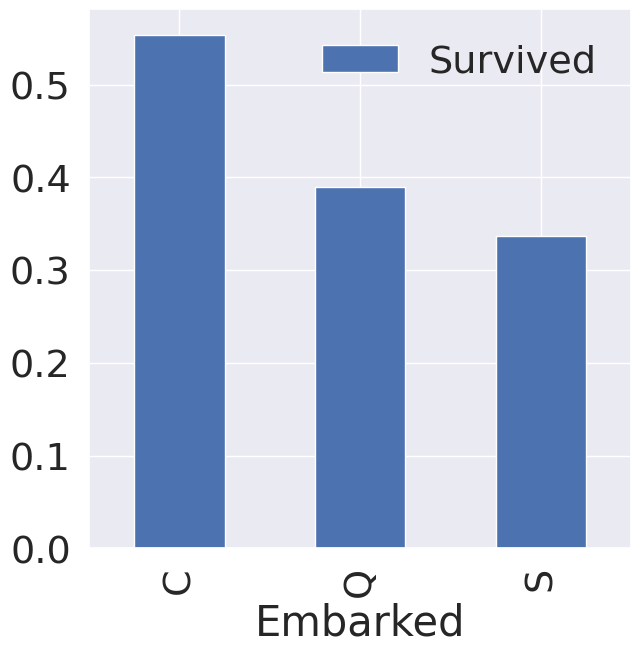

In [33]:
f, ax = plt.subplots(1,1 , figsize = (7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)

* 생존률은 비슷한 수준이나, C에서 조금 높은 수치를 보여줌.

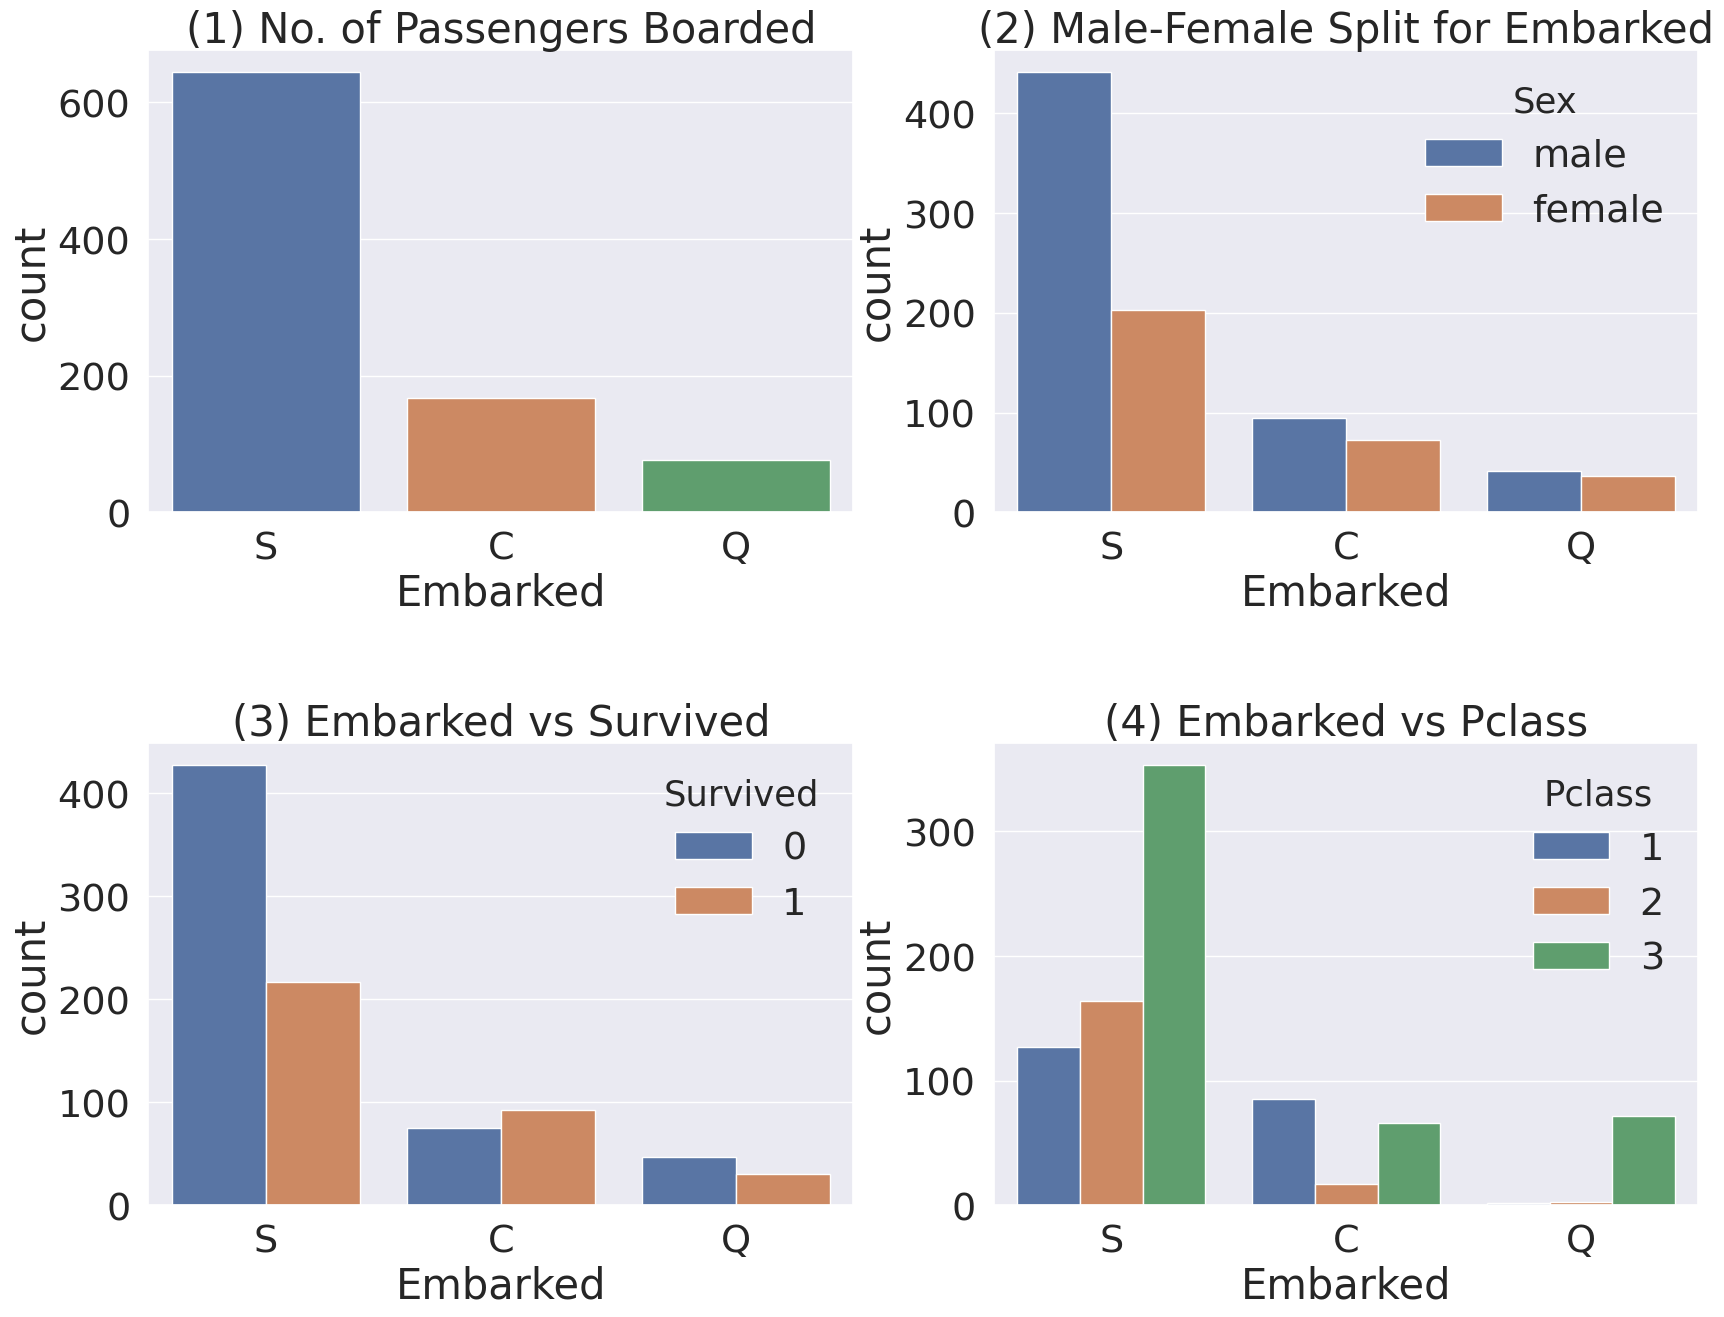

In [35]:
f, ax = plt.subplots(2,2, figsize = (20,15))
sns.countplot(x='Embarked', data = df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot(x='Embarked', hue = 'Sex', data = df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue = 'Survived', data = df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue = 'Pclass', data = df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

* Figure(1): 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승함.
* Figure(2): C와 Q는 남녀 비율이 비슷하고, S는 남자 탑승객이 더 많음.
* Figure(3): 생존 확률이 S의 경우 낮음.
* Figure(4): Class로 split해서 보니, C가 생존 확률이 높은 것은 클래스가 높은 사람이 많아서임. S는 3rd class가 많아서 생존 확률이 낮게 나타남.

### 2.7 Family - SibSp(형제,자매) + Parch(부모,자녀)

* SibSp와 Parch를 합하면 Family가 되며, Family를 이용하여 분석

In [36]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [37]:
print('Maximum Size of Family: ', df_train['FamilySize'].max())
print('Minimum Size of Family: ', df_train['FamilySize'].min())

Maximum Size of Family:  11
Minimum Size of Family:  1


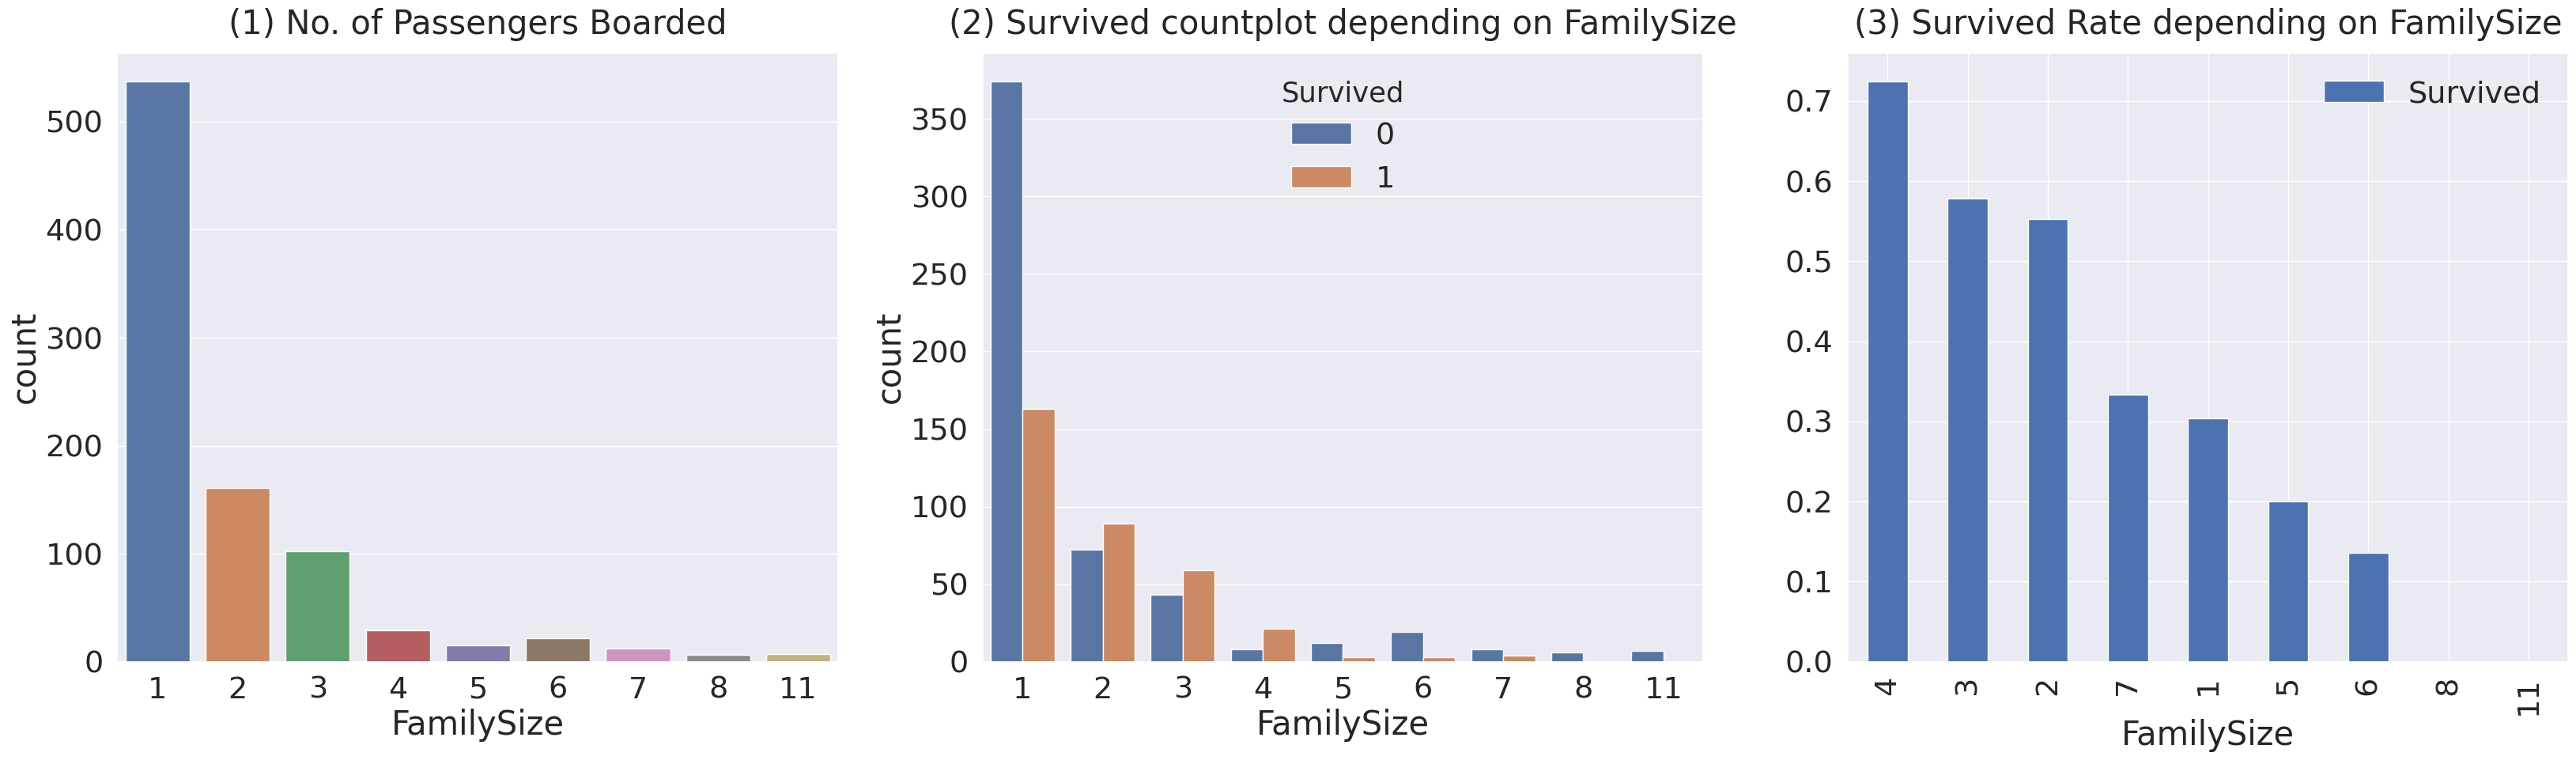

In [38]:
# Family size와 생존 확률 간의 관계 확인
f, ax = plt.subplots(1,3, figsize = (40,10))
sns.countplot(x='FamilySize', data = df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y = 1.02)

sns.countplot(x='FamilySize', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived Rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1): 가족의 크기가 1~11까지 있음. 대부분 1명의 크기를 갖고 있으며, 그 다음으로 2,3,4명의 크기를 갖는다.
* Figure(2),(3): 가족의 크기에 다른 생존 확률을 보면, 가족의 크기가 4명일 때 생존 확률이 가장 높음. 1명인 경우 또는 5명 이상의 크기를 갖는 경우에는 생존 확률이 낮음.

### 2.8 Fare

* Fare는 continuous feature임.

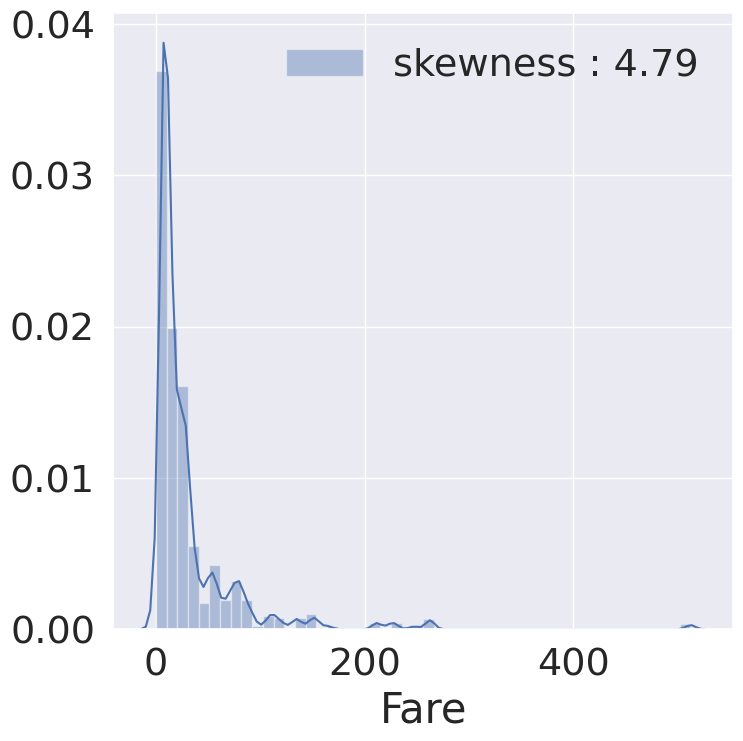

In [39]:
f, ax = plt.subplots(1,1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* Distribution이 매우 비대칭적임 (high skewness). 이대로 모델에 넣어주면 모델이 잘못 학습될 수 있음. 모델이 소수의 이상치에 민감하게 반응하면 실제 예측 시에 좋지 못한 결과를 보일 수 있음.
* 이상치(outlier)의 영향을 줄이기 위해 Fare에 log를 취함.

In [40]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

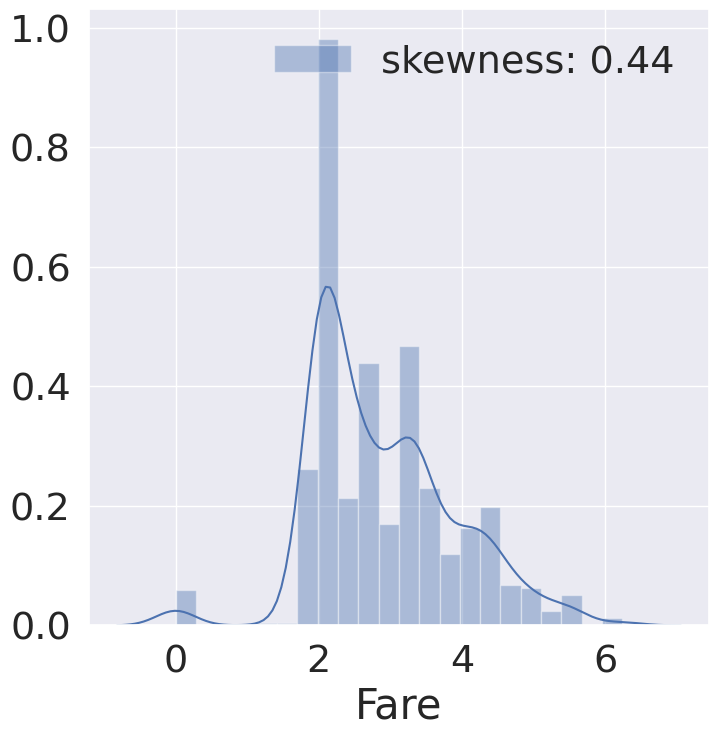

In [41]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g= g.legend(loc='best')

* log를 취한 후, 비대칭성이 많이 사라짐.

### 2.9 Cabin

* 이 feature는 약 80%의 NaN값을 갖고 있으므로, 생존에 영향을 미칠 중효한 정보를 얻기 어려움.
* 모델에 포함하지 않기로 함.

### 2.10 Ticket

* 이 feature는 str 타입의 data를 갖고 있는 feature임. 모델에 적용하기 위해서는 추가 처리가 필요함.

In [43]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64